Customer Churn Prediction :

Churn prediction is a supervised machine learning task where we predict whether a customer will stop using a product or service, based on their historical behavior, usage patterns, and contractual or financial attributes.

High monthly cost → higher churn risk

Short contract → higher churn risk

Low tenure → higher churn risk

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
df = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

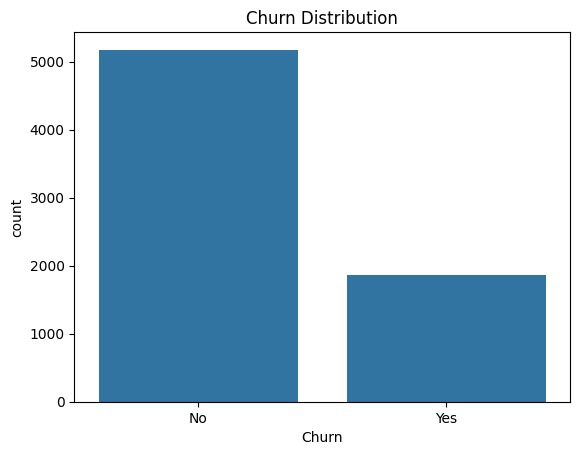

In [4]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [6]:
df.isnull().sum()
df = df.dropna(subset=['TotalCharges'])


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [8]:
numerical_cols
categorical_cols


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

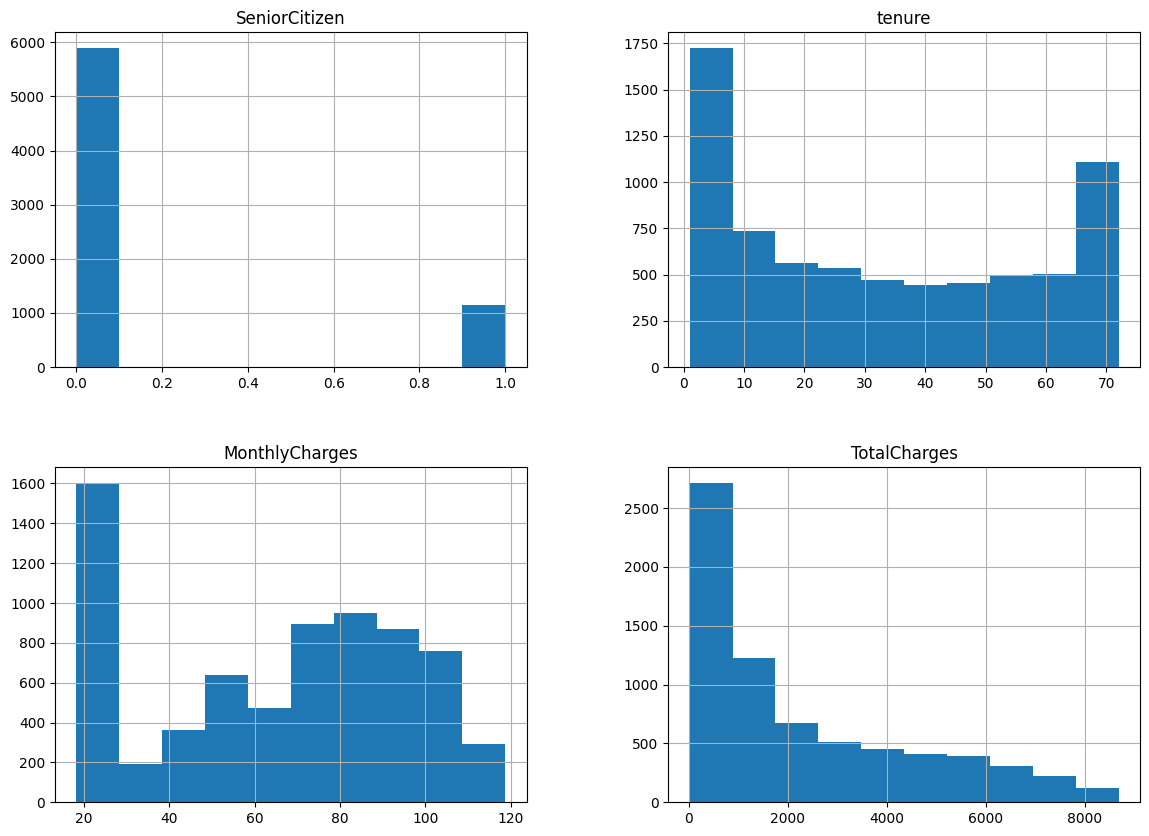

In [9]:
df[numerical_cols].hist(figsize=(14,10))
plt.show()


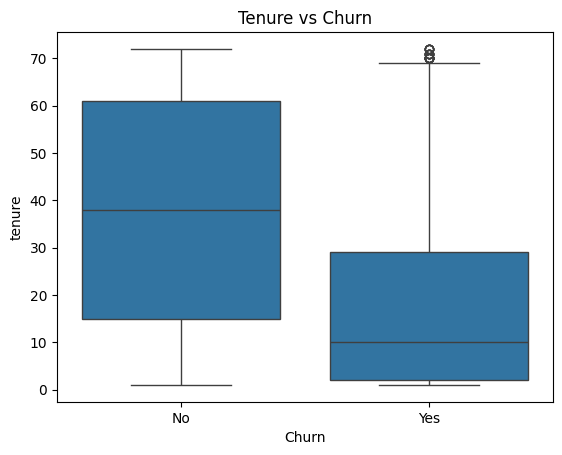

In [10]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()


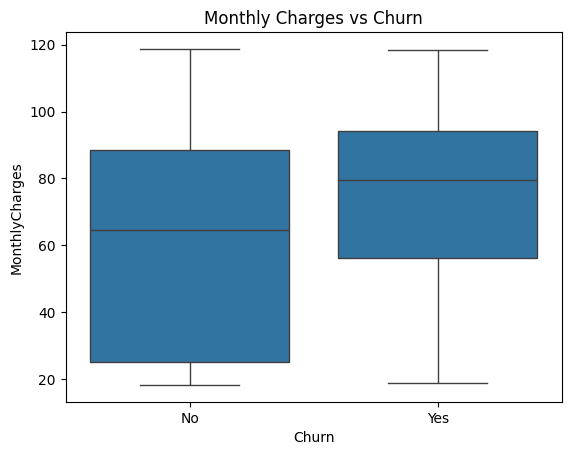

In [11]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()


~Customers with lower tenure churn more

~Higher monthly charges correlate with churn

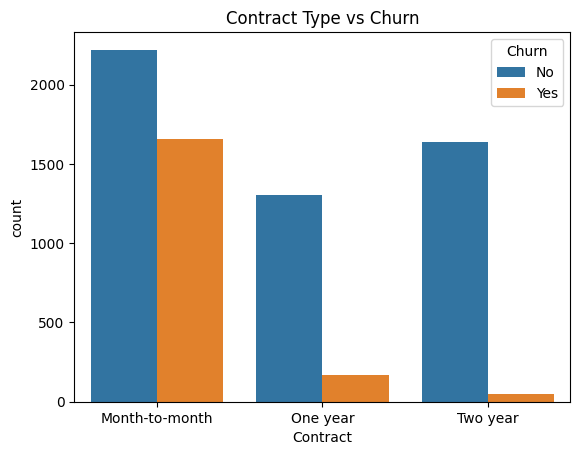

Text(0.5, 1.0, 'Internet Service vs Churn')

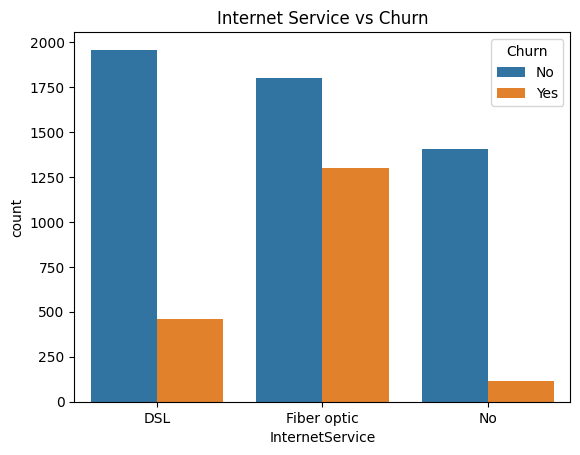

In [12]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.show()
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")

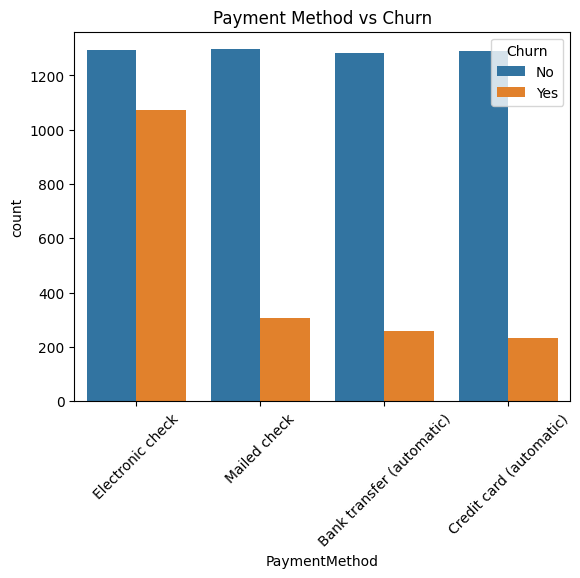

Text(0.5, 1.0, 'Correlation Matrix')

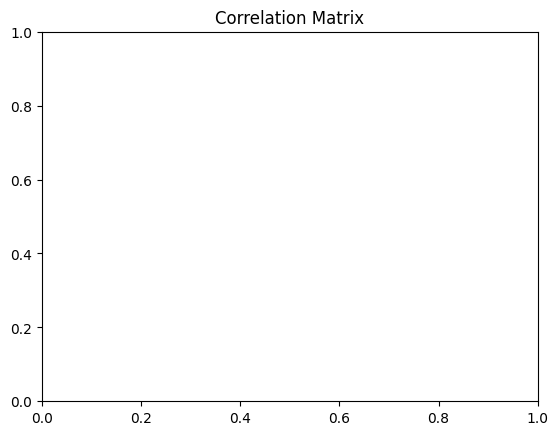

In [14]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title("Payment Method vs Churn")
plt.show()
plt.title("Correlation Matrix")

~Month-to-month contracts churn more

~Certain payment methods have higher churn

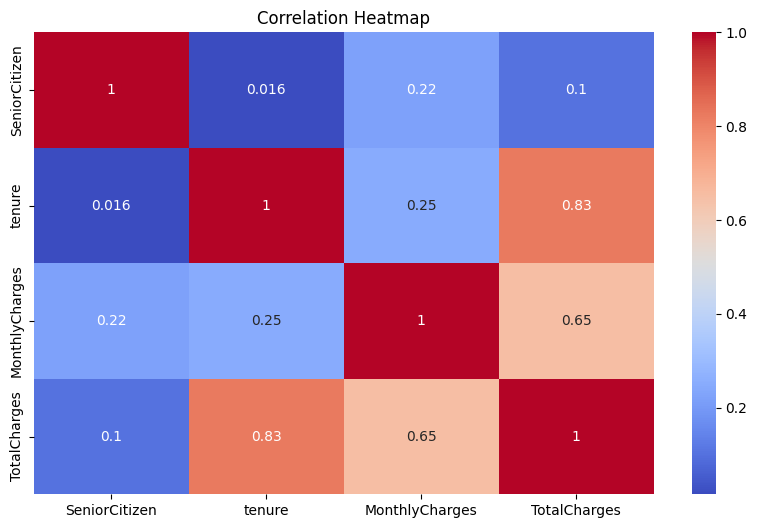

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


~Dataset contains ~7k customers with ~27 features

~Churn rate is ~XX%, indicating moderate imbalance

~Tenure is the strongest churn indicator

~Month-to-month contracts show highest churn

~Higher monthly charges correlate with churn

~Feature engineering will be required for categorical variables

In [16]:
df.groupby('Churn')['MonthlyCharges'].mean()


Churn
No     61.307408
Yes    74.441332
Name: MonthlyCharges, dtype: float64

In [17]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index')


Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887228,0.112772
Two year,0.971513,0.028487
